In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import re
import string



In [2]:
# downloading stopwords corpus

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [3]:
# Read the data

encodings = ['utf-8', 'ISO-8859-1', 'latin1']

for encoding in encodings:
    try:
        df = pd.read_csv("/content/Elon_musk.csv", encoding=encoding)
        print(f"File read successfully with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")

Failed to read with encoding: utf-8
File read successfully with encoding: ISO-8859-1


In [4]:
# Display first 5 rows

df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [5]:
# display last 5 rows

df.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [6]:
# Statistical information of the data

df.describe()

,Unnamed: 0
count,1999.000000
mean,1000.000000
std,577.205914
min,1.000000
25%,500.500000
50%,1000.000000
75%,1499.500000
max,1999.000000


In [7]:
# information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [8]:
# Maintain copies of tha data

df1=df.copy()
df2=df.copy()
df3=df.copy()

In [9]:
df1["char_count"] = df["Text"].str.len()
df1[["Text","char_count"]].head()


,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


In [10]:
df2["word_count"] = df["Text"].apply(lambda x: len(str(x).split(" ")))
df2[["Text","word_count"]].head()


,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [11]:
from nltk.corpus import stopwords
stop = stopwords.words("english")

df3["stopwords"] = df["Text"].apply(lambda x:len([x for x in x.split() if x in stop]))
df3[["Text","stopwords"]].head()

,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


# Visualisation

# Barplot

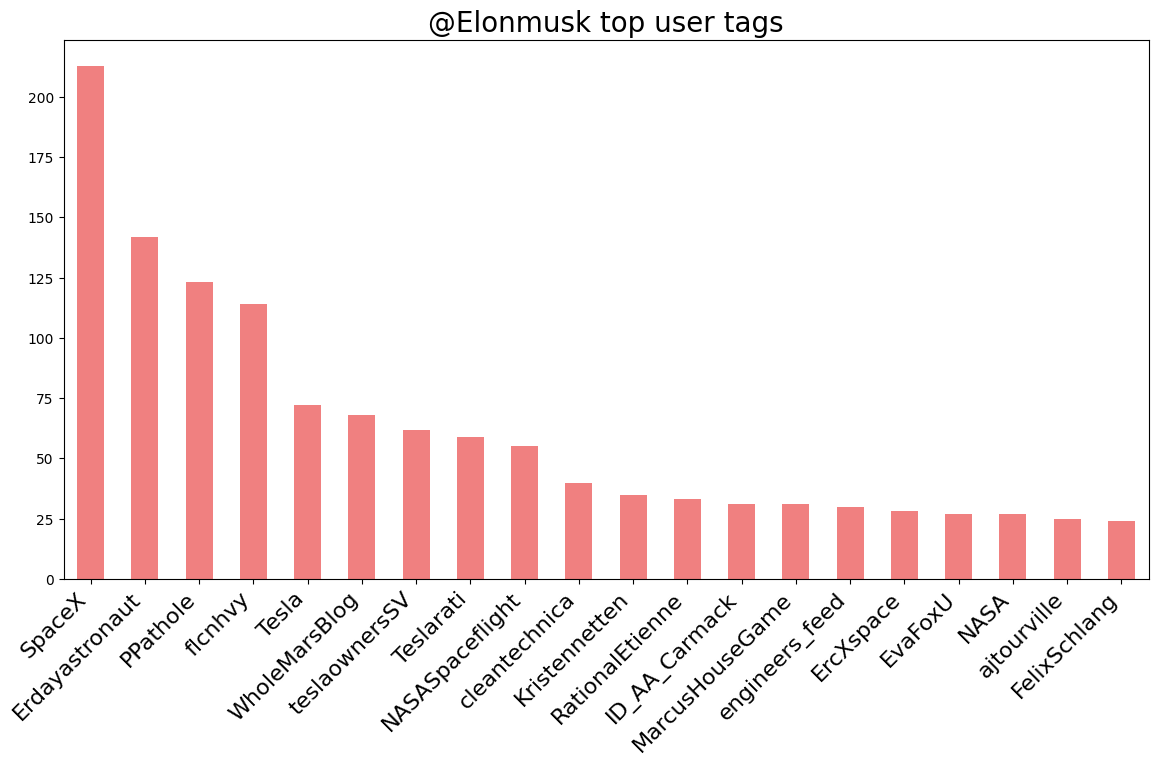

In [12]:
# Assuming you have a DataFrame named 'tweets' with a column 'Tweets'

top_handles = (df['Text'].str.findall(r'@(\w+)').explode().value_counts().head(20))

top_handles.plot.bar(figsize=(14, 7), color='lightcoral')
plt.title('@Elonmusk top user tags', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.show()


 # preprocessing

In [13]:
# Removing all userIDs from the tweets

df['Tweets'] = df['Text'].str.replace(r'@\w+', '')



<ipython-input-13-a9605345648e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweets'] = df['Text'].str.replace(r'@\w+', '')


In [14]:
# Display the modified DataFrame

df.head()

,Unnamed: 0,Text,Tweets
0,1,@kunalb11 Im an alien,Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
2,3,@joerogan @Spotify Great interview!,Great interview!
3,4,@gtera27 Doge is underestimated,Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...


In [15]:
 # remove both the leading and the trailing characters

tweets=[Text.strip() for Text in df.Tweets]
tweets[0:10]


['I\x92m an alien',
 'Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 'Great interview!',
 'Doge is underestimated',
 'Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 'Haha thanks :)',
 'Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [16]:
combined_text = ''.join(tweets)

# Display the combined text
combined_text

'I\x92m an alienRay tracing on Cyberpunk with HDR is next-level. Have you tried it?Great interview!Doge is underestimatedCongratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrMHaha thanks :)Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likelyJust sent someJust agree to do Clubhouse withhttps://t.co/3rWE9uHSTSIt\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodlerHe definitely has issues, but the sentencing seems a bit highThanks for fixingPlease unlock my account<U+0001F923><U+0001F923>This is true power haha https://t.co/Fc9uhQSd7OAny crypto wallet that won\x92t give you your private keys should be avoided at all costsYour app sucksRT : NASA has selected Falcon Heavy to launch the first two elements of the luna

In [17]:
#Removing Numericals,links,Punctuations

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned_text = clean_text(combined_text)

In [18]:
#Function to remove emoji

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

cleaned_text = remove_emoji(cleaned_text)
cleaned_text

'i\x92m an alienray tracing on cyberpunk with hdr is nextlevel have you tried itgreat interviewdoge is underestimatedcongratulations tesla china for amazing execution last year now on to the next for even morehappy new year of the ox  was the underdogeall thought he would failhimself most of all  thanks indeed tweets definitely do not represent realworld time allocationthe most entertaining outcome is the most likelyjust sent somejust agree to do clubhouse with getting realbought some dogecoin for lil x so he can be a toddler hodlerhe definitely has issues but the sentencing seems a bit highthanks for fixingplease unlock my accountthis is true power haha  crypto wallet that won\x92t give you your private keys should be avoided at all costsyour app sucksrt  nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission  we can predict cash flow reasonably well starlink will ipostarlink is a staggeringly difficult technical amp economic endea

# Tokenization

In [19]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(cleaned_text)
len(text_tokens)


14753

In [20]:
# Making the Text in Lowercase

lower_text=[Text.lower() for Text in text_tokens]
len(lower_text)

14753

In [21]:
#Removing stop Words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
no_stop_tokens = [word for word in text_tokens if not word in stop_words]
len(no_stop_tokens)


9151

In [22]:
# joining the words in to single document

doc = ' '.join(no_stop_tokens)
doc


'i\x92m alienray tracing cyberpunk hdr nextlevel tried itgreat interviewdoge underestimatedcongratulations tesla china amazing execution last year next even morehappy new year ox underdogeall thought would failhimself thanks indeed tweets definitely represent realworld time allocationthe entertaining outcome likelyjust sent somejust agree clubhouse getting realbought dogecoin lil x toddler hodlerhe definitely issues sentencing seems bit highthanks fixingplease unlock accountthis true power haha crypto wallet won\x92t give private keys avoided costsyour app sucksrt nasa selected falcon heavy launch first two elements lunar gateway together one mission predict cash flow reasonably well starlink ipostarlink staggeringly difficult technical amp economic endeavor however needs pass deep chasm negative cash flow next year cost per ton carbon sequestered net value product made must scalable g meant price countries difference taxes amp shippingthis intended earth may ideas apply mars tooxprize

In [23]:
# Lemmatization

from nltk.stem import WordNetLemmatizer
Lemmatizer = WordNetLemmatizer()

#lemmas = [token.lemma_ for token in doc]
#print(lemmas[0:25])

lemmas = []
for token in doc.split():
    lemmas.append(Lemmatizer.lemmatize(token))
print(lemmas)

['i\x92m', 'alienray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'itgreat', 'interviewdoge', 'underestimatedcongratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'morehappy', 'new', 'year', 'ox', 'underdogeall', 'thought', 'would', 'failhimself', 'thanks', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocationthe', 'entertaining', 'outcome', 'likelyjust', 'sent', 'somejust', 'agree', 'clubhouse', 'getting', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodlerhe', 'definitely', 'issue', 'sentencing', 'seems', 'bit', 'highthanks', 'fixingplease', 'unlock', 'accountthis', 'true', 'power', 'haha', 'crypto', 'wallet', 'won\x92t', 'give', 'private', 'key', 'avoided', 'costsyour', 'app', 'sucksrt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipostarlink', 'staggeringly', 'dif

In [24]:
clean_tweets=' '.join(lemmas)

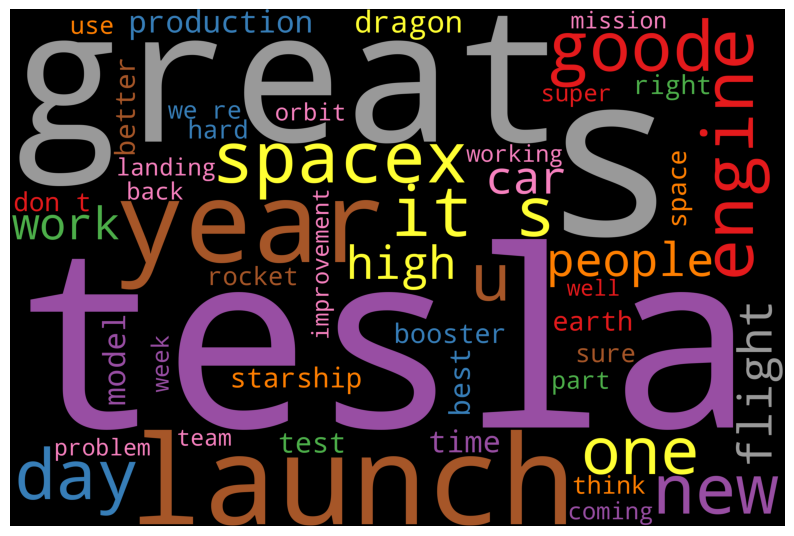

In [25]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.axis('off')

stopwords = set(['go', 'maybe', 'next','also','much','get','way','could','actually','it s','probably','need','lot','make',
                 'we re','take','amp','would','many','don t','like','even','thing'])
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=stopwords).generate(clean_tweets)
plot_cloud(wordcloud)

In [26]:
df = df.drop(columns=['Tweets'])

In [27]:
#PreProcessing
df['Final_tweets'] = df['Text'].str.replace(r'@\w+', '')

df.head()

<ipython-input-27-72e85ef93184>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Final_tweets'] = df['Text'].str.replace(r'@\w+', '')


,Unnamed: 0,Text,Final_tweets
0,1,@kunalb11 Im an alien,Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
2,3,@joerogan @Spotify Great interview!,Great interview!
3,4,@gtera27 Doge is underestimated,Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...


In [28]:
#Removing tweets with empty text

df = df[df['Final_tweets']!='']
df.head(10)


,Unnamed: 0,Text,Final_tweets
0,1,@kunalb11 Im an alien,Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
2,3,@joerogan @Spotify Great interview!,Great interview!
3,4,@gtera27 Doge is underestimated,Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent r...
9,10,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


In [29]:
#Removing https

cleaned_tweets = []

for index, row in df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Final_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

df['Final_tweets'] = cleaned_tweets
df.head(10)

,Unnamed: 0,Text,Final_tweets
0,1,@kunalb11 Im an alien,Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-leve...
2,3,@joerogan @Spotify Great interview!,Great interview!
3,4,@gtera27 Doge is underestimated,Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execut...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox!
6,7,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge, All thought he would ..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent rea...
9,10,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


In [30]:
# Converting text to lowercase, removing text in square brackets,removing links, punctuation and  words containing numbers

def clean_text(text):

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df['Final_tweets']=df['Final_tweets'].apply(lambda x: clean_text(x))
df.head(10)


,Unnamed: 0,Text,Final_tweets
0,1,@kunalb11 Im an alien,im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...
2,3,@joerogan @Spotify Great interview!,great interview
3,4,@gtera27 Doge is underestimated,doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox
6,7,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...
9,10,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [31]:
#Removing Emojis

def remove_emoji(text):
    emoji_pattern = re.compile("[" u"\U0001F600-\U0001F64F" u"\U0001F300-\U0001F5FF"u"\U0001F680-\U0001F6FF" u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


,Unnamed: 0,Text,Final_tweets
0,1,@kunalb11 Im an alien,im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...
2,3,@joerogan @Spotify Great interview!,great interview
3,4,@gtera27 Doge is underestimated,doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox
6,7,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...
9,10,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [32]:
df['Final_tweets']=df['Final_tweets'].apply(lambda x: remove_emoji(x))
df.head(10)


,Unnamed: 0,Text,Final_tweets
0,1,@kunalb11 Im an alien,im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...
2,3,@joerogan @Spotify Great interview!,great interview
3,4,@gtera27 Doge is underestimated,doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox
6,7,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...
9,10,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [33]:
df['tokenized_tweets'] = df['Final_tweets'].apply(lambda x: nltk.word_tokenize(x))
df.head(10)

,Unnamed: 0,Text,Final_tweets,tokenized_tweets
0,1,@kunalb11 Im an alien,im an alien,"[im, an, alien]"
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...,"[ray, tracing, on, cyberpunk, with, hdr, is, n..."
2,3,@joerogan @Spotify Great interview!,great interview,"[great, interview]"
3,4,@gtera27 Doge is underestimated,doge is underestimated,"[doge, is, underestimated]"
4,5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,"[congratulations, tesla, china, for, amazing, ..."
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox,"[happy, new, year, of, the, ox]"
6,7,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...,"[frodo, was, the, underdoge, all, thought, he,..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks,"[haha, thanks]"
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...,"[indeed, tweets, definitely, do, not, represen..."
9,10,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,"[the, most, entertaining, outcome, is, the, mo..."


In [34]:
df = df.drop(columns=['Final_tweets'])

In [35]:
df['tokenized_tweets'] = df['tokenized_tweets'].apply(lambda tokens: [token.lower() for token in tokens])
df.head(10)


,Unnamed: 0,Text,tokenized_tweets
0,1,@kunalb11 Im an alien,"[im, an, alien]"
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"[ray, tracing, on, cyberpunk, with, hdr, is, n..."
2,3,@joerogan @Spotify Great interview!,"[great, interview]"
3,4,@gtera27 Doge is underestimated,"[doge, is, underestimated]"
4,5,@teslacn Congratulations Tesla China for amazi...,"[congratulations, tesla, china, for, amazing, ..."
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,"[happy, new, year, of, the, ox]"
6,7,"Frodo was the underdoge,\nAll thought he would...","[frodo, was, the, underdoge, all, thought, he,..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),"[haha, thanks]"
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,"[indeed, tweets, definitely, do, not, represen..."
9,10,The most entertaining outcome is the most likely,"[the, most, entertaining, outcome, is, the, mo..."


In [36]:
#Stopwords

from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw = ['i’m','\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4','go', 'maybe', 'next','also','much','get','way',
           'could','actually','it s','probably','need','lot','make', 'we re','take','amp','would','many','don t','like','even','thing']
my_stop_words.extend(sw)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in df.iterrows():

    # filerting out all the stopwords
     words_without_stopwords = [word for word in row.tokenized_tweets if word.lower() not in my_stop_words and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
     cleaned_tweets.append(' '.join(words_without_stopwords))

df['Final_tweets'] = cleaned_tweets
df.head(10)

,Unnamed: 0,Text,tokenized_tweets,Final_tweets
0,1,@kunalb11 Im an alien,"[im, an, alien]",im alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"[ray, tracing, on, cyberpunk, with, hdr, is, n...",ray tracing cyberpunk hdr nextlevel tried
2,3,@joerogan @Spotify Great interview!,"[great, interview]",great interview
3,4,@gtera27 Doge is underestimated,"[doge, is, underestimated]",doge underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,"[congratulations, tesla, china, for, amazing, ...",congratulations tesla china amazing execution ...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,"[happy, new, year, of, the, ox]",happy new year ox
6,7,"Frodo was the underdoge,\nAll thought he would...","[frodo, was, the, underdoge, all, thought, he,...",frodo underdoge thought fail
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),"[haha, thanks]",thanks
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,"[indeed, tweets, definitely, do, not, represen...",indeed tweets definitely represent realworld t...
9,10,The most entertaining outcome is the most likely,"[the, most, entertaining, outcome, is, the, mo...",entertaining outcome likely


# Lemmatization

In [37]:
tokenized_tweet = df['Final_tweets'].apply(lambda x: x.split())
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])


In [38]:
df['Final_tweets'] = tokenized_tweet
df['Final_tweets'] = df['Final_tweets'].apply(lambda x: ' '.join(x))
df.head(10)

,Unnamed: 0,Text,tokenized_tweets,Final_tweets
0,1,@kunalb11 Im an alien,"[im, an, alien]",im alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"[ray, tracing, on, cyberpunk, with, hdr, is, n...",ray tracing cyberpunk hdr nextlevel tried
2,3,@joerogan @Spotify Great interview!,"[great, interview]",great interview
3,4,@gtera27 Doge is underestimated,"[doge, is, underestimated]",doge underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,"[congratulations, tesla, china, for, amazing, ...",congratulation tesla china amazing execution l...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,"[happy, new, year, of, the, ox]",happy new year ox
6,7,"Frodo was the underdoge,\nAll thought he would...","[frodo, was, the, underdoge, all, thought, he,...",frodo underdoge thought fail
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),"[haha, thanks]",thanks
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,"[indeed, tweets, definitely, do, not, represen...",indeed tweet definitely represent realworld ti...
9,10,The most entertaining outcome is the most likely,"[the, most, entertaining, outcome, is, the, mo...",entertaining outcome likely


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweets_cv=cv.fit_transform(lemmas)

In [40]:
pd.DataFrame.from_records([cv.vocabulary_]).T.sort_values(0,ascending=True).tail(30)

,0
yearsstarshipsuper,3918
yearthe,3919
yes,3920
yesi,3921
yesolde,3922
yesrt,3923
yesterday,3924
yesyeah,3925
yet,3926
yetnot,3927


# Feature Extraction

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [42]:
sentiments_using_SIA = df.Final_tweets.apply(lambda x: fetch_sentiment_using_SIA(x))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Final_tweets
pos,1794
neg,205


In [43]:
df4=pd.DataFrame()
df4['Tweets'] = df.Final_tweets
sid = SentimentIntensityAnalyzer()
df4['scores'] = df4['Tweets'].apply(lambda x: sid.polarity_scores(x))
df4['compound']  = df4['scores'].apply(lambda x: x['compound'])
df4 = df4.drop(columns=['scores'])
df4.head()


,Tweets,compound
0,im alien,0.0000
1,ray tracing cyberpunk hdr nextlevel tried,0.0000
2,great interview,0.6249
3,doge underestimated,-0.2732
4,congratulation tesla china amazing execution l...,0.8271


In [44]:
df4['sentiment'] = df4['compound'].apply(lambda c: 'Positive' if c >= 0.05 else 'Negative' if c <= -0.05 else 'Neutral')
df4.head()

,Tweets,compound,sentiment
0,im alien,0.0000,Neutral
1,ray tracing cyberpunk hdr nextlevel tried,0.0000,Neutral
2,great interview,0.6249,Positive
3,doge underestimated,-0.2732,Negative
4,congratulation tesla china amazing execution l...,0.8271,Positive


In [45]:
df4['sentiment'].value_counts()

Neutral     987
Positive    811
Negative    201
Name: sentiment, dtype: int64

(array([987.,   0.,   0.,   0.,   0., 811.,   0.,   0.,   0., 201.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

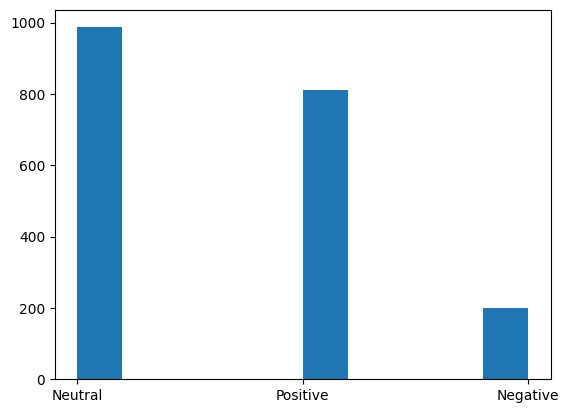

In [46]:
plt.hist(df4['sentiment'])